important 変数を個々に定義する

In [1]:
SensorNum=2 # Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccY' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccY is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [9]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 208s - loss: 0.0377 - val_loss: 0.0088
Epoch 2/50
15921/15921 [==============================] - 217s - loss: 0.0131 - val_loss: 0.0066
Epoch 3/50
15921/15921 [==============================] - 132s - loss: 0.0101 - val_loss: 0.0051
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0084 - val_loss: 0.0040
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0071 - val_loss: 0.0032
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0063 - val_loss: 0.0027
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0056 - val_loss: 0.0025
Epoch 8/50
15921/15921 [==============================] - 18s - loss: 0.0052 - val_loss: 0.0021
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.0048 - val_loss: 0.0020
Epoch 10/50
15921/15921 [==============================] - 20s

/home/takeyama/.pyenv/versions/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


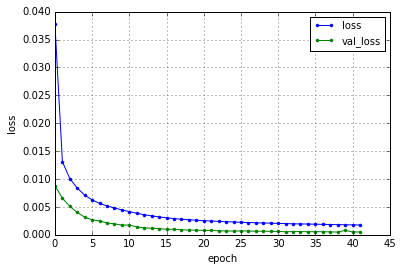

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0359 - val_loss: 0.0071
Epoch 2/50
15921/15921 [==============================] - 19s - loss: 0.0117 - val_loss: 0.0041
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0081 - val_loss: 0.0029
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0064 - val_loss: 0.0018
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0055 - val_loss: 0.0017
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0048 - val_loss: 0.0014
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0043 - val_loss: 9.7802e-04
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0039 - val_loss: 9.9012e-04
Epoch 9/50
15921/15921 [==============================] - 192s - loss: 0.0036 - val_loss: 7.8770e-04
Epoch 10/50
15921/15921 [==============================] - 220s - loss: 0

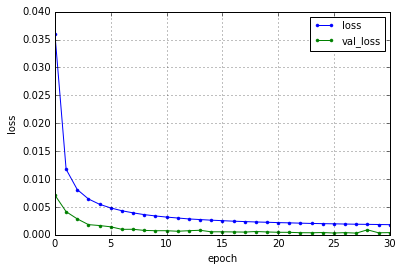

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 206s - loss: 0.0371 - val_loss: 0.0056
Epoch 2/50
15921/15921 [==============================] - 212s - loss: 0.0111 - val_loss: 0.0026
Epoch 3/50
15921/15921 [==============================] - 202s - loss: 0.0075 - val_loss: 0.0017
Epoch 4/50
15921/15921 [==============================] - 213s - loss: 0.0060 - val_loss: 0.0011
Epoch 5/50
15921/15921 [==============================] - 200s - loss: 0.0050 - val_loss: 9.4277e-04
Epoch 6/50
15921/15921 [==============================] - 212s - loss: 0.0044 - val_loss: 7.6039e-04
Epoch 7/50
15921/15921 [==============================] - 202s - loss: 0.0039 - val_loss: 5.9091e-04
Epoch 8/50
15921/15921 [==============================] - 212s - loss: 0.0036 - val_loss: 5.3303e-04
Epoch 9/50
15921/15921 [==============================] - 201s - loss: 0.0033 - val_loss: 4.3128e-04
Epoch 10/50
15921/15921 [==============================] 

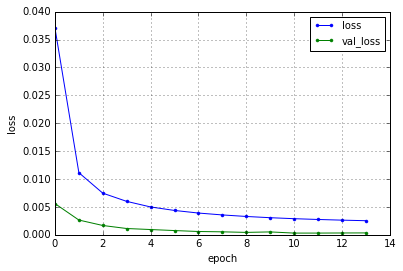

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 200s - loss: 0.0405 - val_loss: 0.0055
Epoch 2/50
15921/15921 [==============================] - 213s - loss: 0.0121 - val_loss: 0.0032
Epoch 3/50
15921/15921 [==============================] - 202s - loss: 0.0088 - val_loss: 0.0020
Epoch 4/50
15921/15921 [==============================] - 201s - loss: 0.0070 - val_loss: 0.0015
Epoch 5/50
15921/15921 [==============================] - 213s - loss: 0.0058 - val_loss: 9.5700e-04
Epoch 6/50
15921/15921 [==============================] - 200s - loss: 0.0049 - val_loss: 7.5588e-04
Epoch 7/50
15921/15921 [==============================] - 213s - loss: 0.0044 - val_loss: 7.5372e-04
Epoch 8/50
15921/15921 [==============================] - 201s - loss: 0.0040 - val_loss: 6.2194e-04
Epoch 9/50
15921/15921 [==============================] - 212s - loss: 0.0037 - val_loss: 6.0545e-04
Epoch 10/50
15921/15921 [==============================] 

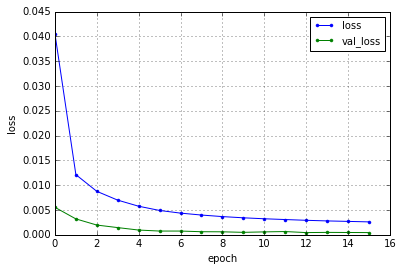

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 213s - loss: 0.0325 - val_loss: 0.0018
Epoch 2/50
15921/15921 [==============================] - 202s - loss: 0.0086 - val_loss: 9.3738e-04
Epoch 3/50
15921/15921 [==============================] - 212s - loss: 0.0066 - val_loss: 7.7446e-04
Epoch 4/50
15921/15921 [==============================] - 211s - loss: 0.0056 - val_loss: 5.8467e-04
Epoch 5/50
15921/15921 [==============================] - 202s - loss: 0.0050 - val_loss: 7.0356e-04
Epoch 6/50
15921/15921 [==============================] - 214s - loss: 0.0045 - val_loss: 7.8215e-04
Epoch 7/50
15921/15921 [==============================] - 201s - loss: 0.0042 - val_loss: 6.7079e-04


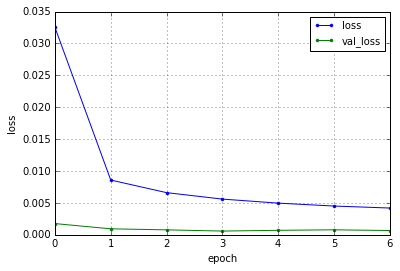

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 213s - loss: 0.0338 - val_loss: 8.6757e-04
Epoch 2/50
15921/15921 [==============================] - 202s - loss: 0.0090 - val_loss: 5.9660e-04
Epoch 3/50
15921/15921 [==============================] - 213s - loss: 0.0071 - val_loss: 4.7683e-04
Epoch 4/50
15921/15921 [==============================] - 94s - loss: 0.0061 - val_loss: 6.1751e-04
Epoch 5/50
15921/15921 [==============================] - 202s - loss: 0.0055 - val_loss: 5.1139e-04
Epoch 6/50
15921/15921 [==============================] - 212s - loss: 0.0051 - val_loss: 0.0020


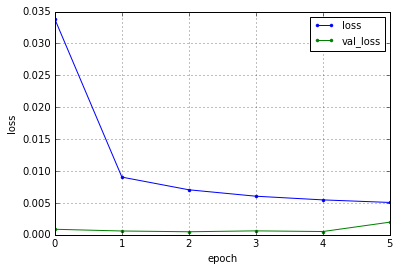

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 200s - loss: 0.1003 - val_loss: 0.0223
Epoch 2/50
15921/15921 [==============================] - 212s - loss: 0.0383 - val_loss: 0.0112
Epoch 3/50
15921/15921 [==============================] - 177s - loss: 0.0281 - val_loss: 0.0090
Epoch 4/50
15921/15921 [==============================] - 212s - loss: 0.0240 - val_loss: 0.0073
Epoch 5/50
15921/15921 [==============================] - 173s - loss: 0.0213 - val_loss: 0.0066
Epoch 6/50
15921/15921 [==============================] - 210s - loss: 0.0192 - val_loss: 0.0053
Epoch 7/50
15921/15921 [==============================] - 196s - loss: 0.0173 - val_loss: 0.0041
Epoch 8/50
15921/15921 [==============================] - 211s - loss: 0.0158 - val_loss: 0.0034
Epoch 9/50
15921/15921 [==============================] - 199s - loss: 0.0146 - val_loss: 0.0029
Epoch 10/50
15921/15921 [==============================] 

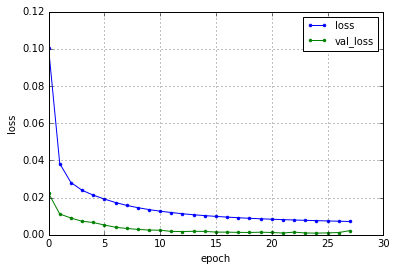

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 201s - loss: 0.0719 - val_loss: 0.0102
Epoch 2/50
15921/15921 [==============================] - 213s - loss: 0.0296 - val_loss: 0.0079
Epoch 3/50
15921/15921 [==============================] - 200s - loss: 0.0253 - val_loss: 0.0071
Epoch 4/50
15921/15921 [==============================] - 213s - loss: 0.0224 - val_loss: 0.0060
Epoch 5/50
15921/15921 [==============================] - 201s - loss: 0.0203 - val_loss: 0.0048
Epoch 6/50
15921/15921 [==============================] - 213s - loss: 0.0187 - val_loss: 0.0041
Epoch 7/50
15921/15921 [==============================] - 200s - loss: 0.0172 - val_loss: 0.0036
Epoch 8/50
15921/15921 [==============================] - 214s - loss: 0.0161 - val_loss: 0.0031
Epoch 9/50
15921/15921 [==============================] - 152s - loss: 0.0151 - val_loss: 0.0031
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0142

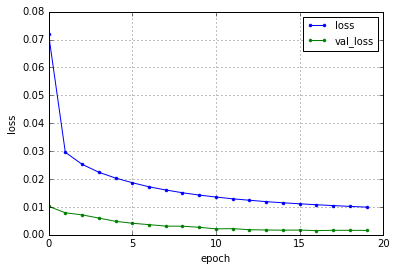

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1117 - val_loss: 0.0180
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0394 - val_loss: 0.0097
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0303 - val_loss: 0.0078
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0265 - val_loss: 0.0063
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0235 - val_loss: 0.0052
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0213 - val_loss: 0.0039
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0196 - val_loss: 0.0037
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0182 - val_loss: 0.0032
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0170 - val_loss: 0.0026
Epoch 10/50
15921/15921 [==============================] - 13s - loss: 0.0161 - val_lo

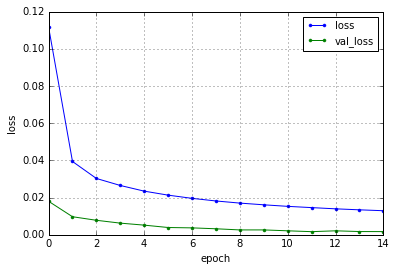

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.0950 - val_loss: 0.0101
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0374 - val_loss: 0.0078
Epoch 3/50
15921/15921 [==============================] - 12s - loss: 0.0302 - val_loss: 0.0062
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0258 - val_loss: 0.0046
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0229 - val_loss: 0.0037
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0208 - val_loss: 0.0031
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0192 - val_loss: 0.0027
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0180 - val_loss: 0.0025
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0170 - val_loss: 0.0023
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0162 - val_lo

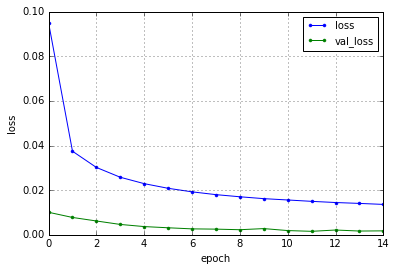

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1194 - val_loss: 0.0086
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0442 - val_loss: 0.0066
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0345 - val_loss: 0.0050
Epoch 4/50
15921/15921 [==============================] - 13s - loss: 0.0298 - val_loss: 0.0040
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0269 - val_loss: 0.0035
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0247 - val_loss: 0.0027
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0231 - val_loss: 0.0028
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0218 - val_loss: 0.0021
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0209 - val_loss: 0.0030
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0200 - val_lo

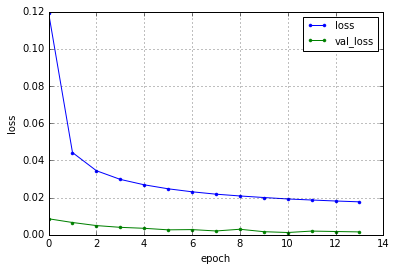

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1535 - val_loss: 0.0149
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0547 - val_loss: 0.0084
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0443 - val_loss: 0.0065
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0396 - val_loss: 0.0056
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0366 - val_loss: 0.0036
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0346 - val_loss: 0.0025
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0325 - val_loss: 0.0038
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0315 - val_loss: 0.0031
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0302 - val_loss: 0.0024
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0296 - val_lo

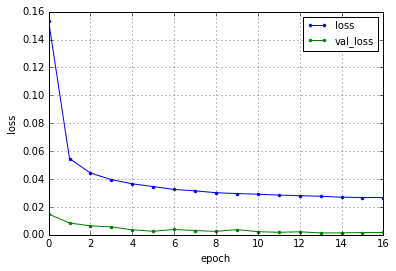

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1243 - val_loss: 0.0780
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0889 - val_loss: 0.0758
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0862 - val_loss: 0.0733
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0818 - val_loss: 0.0521
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0648 - val_loss: 0.0205
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0497 - val_loss: 0.0134
Epoch 7/50
15921/15921 [==============================] - 13s - loss: 0.0420 - val_loss: 0.0112
Epoch 8/50
15921/15921 [==============================] - 13s - loss: 0.0376 - val_loss: 0.0110
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0347 - val_loss: 0.0100
Epoch 10/50
15921/15921 [==============================] - 14s - l

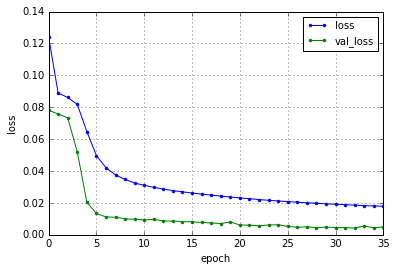

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1672 - val_loss: 0.0736
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0939 - val_loss: 0.0320
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0676 - val_loss: 0.0157
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0531 - val_loss: 0.0122
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0455 - val_loss: 0.0105
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0413 - val_loss: 0.0101
Epoch 7/50
15921/15921 [==============================] - 13s - loss: 0.0384 - val_loss: 0.0099
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0364 - val_loss: 0.0097
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0348 - val_loss: 0.0087
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0335 - val_lo

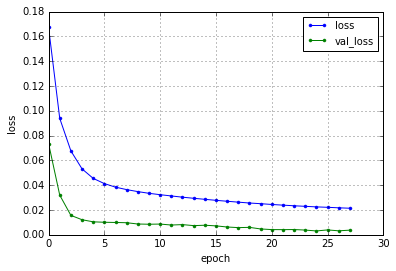

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1565 - val_loss: 0.0769
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0989 - val_loss: 0.0652
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0846 - val_loss: 0.0251
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0654 - val_loss: 0.0166
Epoch 5/50
15921/15921 [==============================] - 13s - loss: 0.0547 - val_loss: 0.0117
Epoch 6/50
15921/15921 [==============================] - 13s - loss: 0.0488 - val_loss: 0.0105
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0447 - val_loss: 0.0090
Epoch 8/50
15921/15921 [==============================] - 13s - loss: 0.0420 - val_loss: 0.0083
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0397 - val_loss: 0.0080
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0379 - val_lo

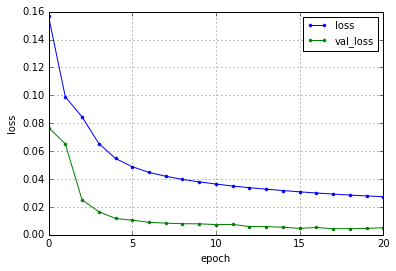

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.2070 - val_loss: 0.0779
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1026 - val_loss: 0.0742
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0962 - val_loss: 0.0495
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0785 - val_loss: 0.0177
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0624 - val_loss: 0.0130
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0546 - val_loss: 0.0100
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0498 - val_loss: 0.0091
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0466 - val_loss: 0.0084
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0441 - val_loss: 0.0089
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0420 - val_lo

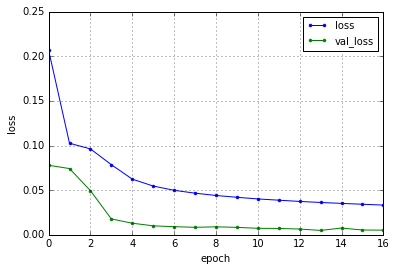

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2702 - val_loss: 0.0758
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1259 - val_loss: 0.0748
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1116 - val_loss: 0.0418
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0881 - val_loss: 0.0149
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0743 - val_loss: 0.0115
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0674 - val_loss: 0.0107
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0626 - val_loss: 0.0092
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0594 - val_loss: 0.0089
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0569 - val_loss: 0.0079
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0549 - val_lo

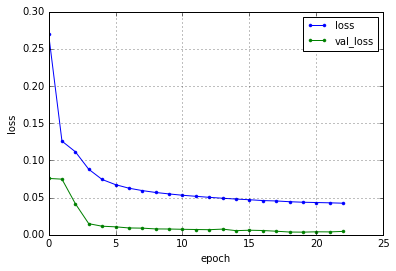

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2794 - val_loss: 0.0731
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1484 - val_loss: 0.0741
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1323 - val_loss: 0.0518
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1138 - val_loss: 0.0236
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0999 - val_loss: 0.0127
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0927 - val_loss: 0.0202
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0883 - val_loss: 0.0096
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0849 - val_loss: 0.0088
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0828 - val_loss: 0.0078
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0809 - val_lo

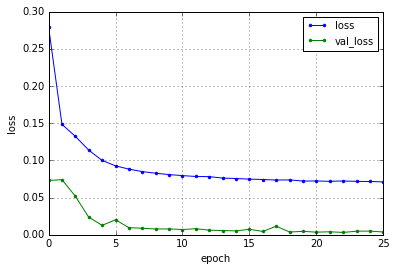

L1 parameter is 0.5
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1722 - val_loss: 0.0779
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1018 - val_loss: 0.0775
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0916 - val_loss: 0.0733
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0851 - val_loss: 0.0469
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0708 - val_loss: 0.0230
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0599 - val_loss: 0.0178
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0528 - val_loss: 0.0143
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0482 - val_loss: 0.0138
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0451 - val_loss: 0.0129
Epoch 10/50
15921/15921 [==============================] - 14s - l

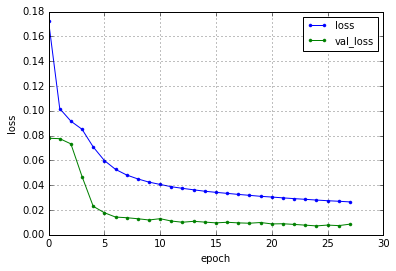

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1987 - val_loss: 0.0786
Epoch 2/50
15921/15921 [==============================] - 11s - loss: 0.1071 - val_loss: 0.0791
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1007 - val_loss: 0.0796
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0975 - val_loss: 0.0769
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0949 - val_loss: 0.0765
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0918 - val_loss: 0.0565
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0805 - val_loss: 0.0263
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0681 - val_loss: 0.0169
Epoch 9/50
15921/15921 [==============================] - 8s - loss: 0.0601 - val_loss: 0.0132
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0548 - val_loss: 0.01

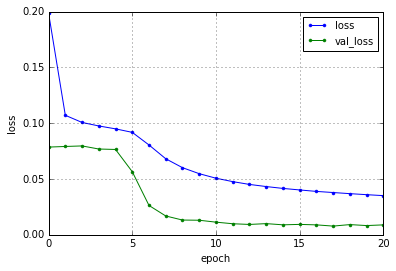

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2084 - val_loss: 0.0763
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1134 - val_loss: 0.0771
Epoch 3/50
15921/15921 [==============================] - 10s - loss: 0.1059 - val_loss: 0.0740
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1014 - val_loss: 0.0596
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0917 - val_loss: 0.0295
Epoch 6/50
15921/15921 [==============================] - 10s - loss: 0.0783 - val_loss: 0.0200
Epoch 7/50
15921/15921 [==============================] - 10s - loss: 0.0697 - val_loss: 0.0150
Epoch 8/50
15921/15921 [==============================] - 10s - loss: 0.0640 - val_loss: 0.0128
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0597 - val_loss: 0.0121
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0564 - val_loss: 0.

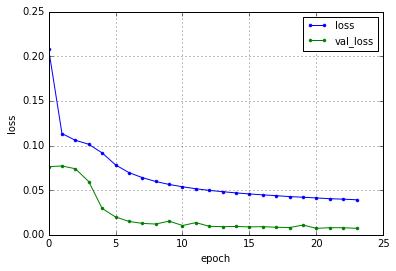

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2360 - val_loss: 0.0765
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1172 - val_loss: 0.0769
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1096 - val_loss: 0.0745
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1049 - val_loss: 0.0625
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0940 - val_loss: 0.0302
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0811 - val_loss: 0.0185
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0728 - val_loss: 0.0144
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0671 - val_loss: 0.0126
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0632 - val_loss: 0.0116
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0600 - val_loss: 0.0112

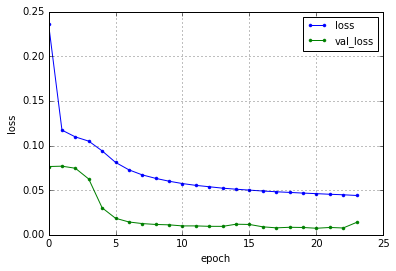

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3251 - val_loss: 0.0755
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1506 - val_loss: 0.0755
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1364 - val_loss: 0.0736
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1273 - val_loss: 0.0670
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1189 - val_loss: 0.0397
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1061 - val_loss: 0.0236
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0966 - val_loss: 0.0164
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0899 - val_loss: 0.0160
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0857 - val_loss: 0.0108
Epoch 10/50
15921/15921 [==============================] - 7s - loss: 0.0819 - val_loss: 0.0125

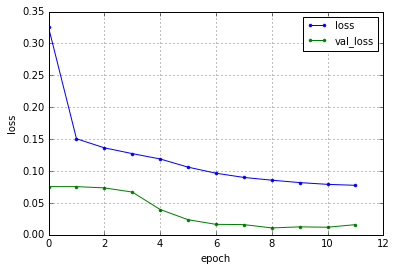

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.4098 - val_loss: 0.0755
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1976 - val_loss: 0.0772
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1788 - val_loss: 0.0792
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1695 - val_loss: 0.0664
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1599 - val_loss: 0.0473
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1485 - val_loss: 0.0217
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1399 - val_loss: 0.0152
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1342 - val_loss: 0.0154
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1305 - val_loss: 0.0123
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.1274 - val_loss: 0.0142

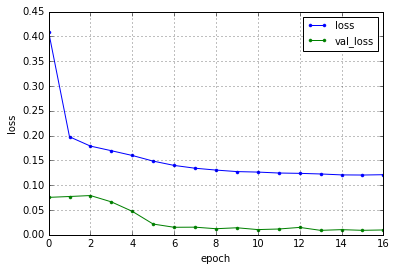

L1 parameter is 0.7
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1898 - val_loss: 0.0808
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1045 - val_loss: 0.0798
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.0974 - val_loss: 0.0793
Epoch 4/50
15921/15921 [==============================] - 10s - loss: 0.0956 - val_loss: 0.0791
Epoch 5/50
15921/15921 [==============================] - 8s - loss: 0.0943 - val_loss: 0.0794
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0932 - val_loss: 0.0751
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0907 - val_loss: 0.0621
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0831 - val_loss: 0.0337
Epoch 9/50
15921/15921 [==============================] - 7s - loss: 0.0730 - val_loss: 0.0260
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.06

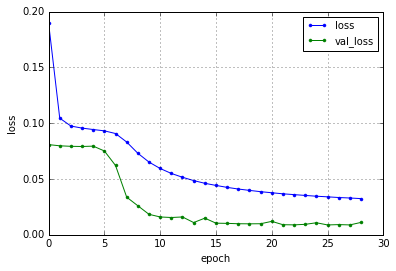

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 10s - loss: 0.2040 - val_loss: 0.0794
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1256 - val_loss: 0.0782
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1164 - val_loss: 0.0779
Epoch 4/50
15921/15921 [==============================] - 10s - loss: 0.1111 - val_loss: 0.0778
Epoch 5/50
15921/15921 [==============================] - 11s - loss: 0.1075 - val_loss: 0.0776
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1043 - val_loss: 0.0755
Epoch 7/50
15921/15921 [==============================] - 10s - loss: 0.1012 - val_loss: 0.0716
Epoch 8/50
15921/15921 [==============================] - 10s - loss: 0.0966 - val_loss: 0.0513
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0873 - val_loss: 0.0299
Epoch 10/50
15921/15921 [==============================] - 10s - loss: 0.0768 - val_loss: 

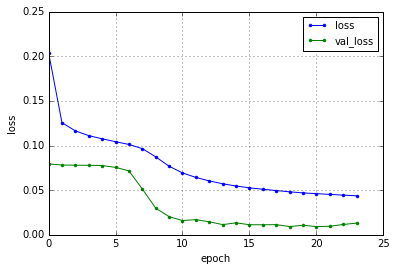

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.2785 - val_loss: 0.0777
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1333 - val_loss: 0.0763
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1235 - val_loss: 0.0752
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1172 - val_loss: 0.0771
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1131 - val_loss: 0.0740
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1101 - val_loss: 0.0697
Epoch 7/50
15921/15921 [==============================] - 4s - loss: 0.1065 - val_loss: 0.0587
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.0999 - val_loss: 0.0395
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.0905 - val_loss: 0.0269
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.0823 - val_loss: 0.0187

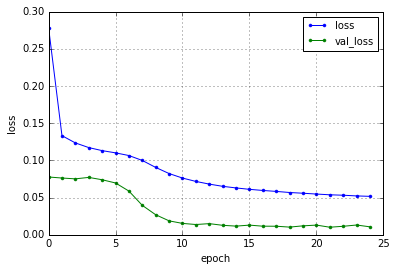

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.3260 - val_loss: 0.0788
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1402 - val_loss: 0.0786
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1289 - val_loss: 0.0770
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1236 - val_loss: 0.0767
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1200 - val_loss: 0.0713
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1167 - val_loss: 0.0750
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1130 - val_loss: 0.0590
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1065 - val_loss: 0.0460
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.0973 - val_loss: 0.0304
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.0896 - val_loss: 0.0193

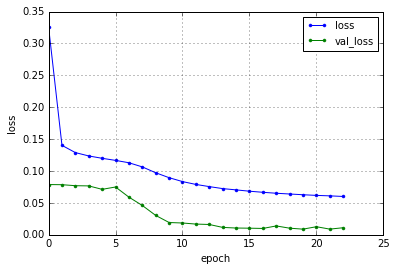

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.4191 - val_loss: 0.0762
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1903 - val_loss: 0.0769
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1670 - val_loss: 0.0760
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1572 - val_loss: 0.0683
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1519 - val_loss: 0.0730
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1474 - val_loss: 0.0697
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1417 - val_loss: 0.0581
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1351 - val_loss: 0.0519
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1266 - val_loss: 0.0284
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.1187 - val_loss: 0.0191

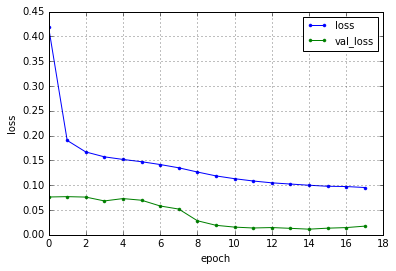

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.5183 - val_loss: 0.0744
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.2498 - val_loss: 0.0768
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.2252 - val_loss: 0.0747
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.2152 - val_loss: 0.0738
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.2091 - val_loss: 0.0709
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.2010 - val_loss: 0.0634
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1945 - val_loss: 0.0649
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1851 - val_loss: 0.0688
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1778 - val_loss: 0.0297
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.1721 - val_loss: 0.0212

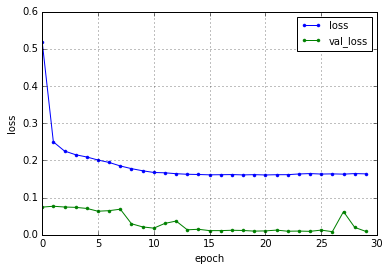

L1 parameter is 0.9
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.1664 - val_loss: 0.0801
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1058 - val_loss: 0.0798
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1010 - val_loss: 0.0785
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.0977 - val_loss: 0.0795
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.0954 - val_loss: 0.0787
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.0942 - val_loss: 0.0775
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.0934 - val_loss: 0.0784
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.0924 - val_loss: 0.0760
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.0910 - val_loss: 0.0718
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.088

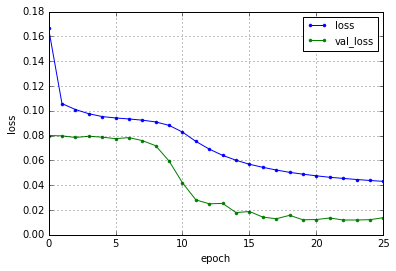

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 4s - loss: 0.2688 - val_loss: 0.0779
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1398 - val_loss: 0.0783
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1284 - val_loss: 0.0772
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1220 - val_loss: 0.0749
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1172 - val_loss: 0.0768
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1134 - val_loss: 0.0749
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1096 - val_loss: 0.0716
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1063 - val_loss: 0.0704
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1030 - val_loss: 0.0681
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.0987 - val_loss: 0.0515

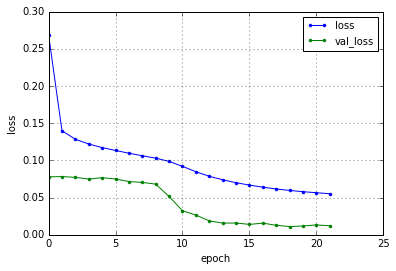

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 4s - loss: 0.2814 - val_loss: 0.0773
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1484 - val_loss: 0.0772
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1343 - val_loss: 0.0764
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1263 - val_loss: 0.0776
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1219 - val_loss: 0.0760
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1191 - val_loss: 0.0781
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1167 - val_loss: 0.0769
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1137 - val_loss: 0.0667
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1101 - val_loss: 0.0610
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.1060 - val_loss: 0.0446

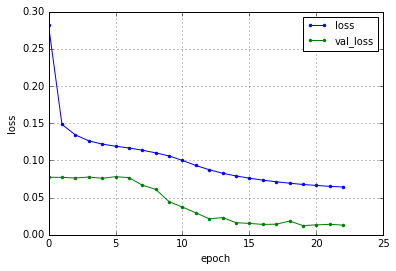

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.3681 - val_loss: 0.0781
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1659 - val_loss: 0.0780
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1441 - val_loss: 0.0787
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1387 - val_loss: 0.0764
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1360 - val_loss: 0.0778
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1338 - val_loss: 0.0765
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1317 - val_loss: 0.0748
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1286 - val_loss: 0.0728
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1258 - val_loss: 0.0718
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.1218 - val_loss: 0.0618

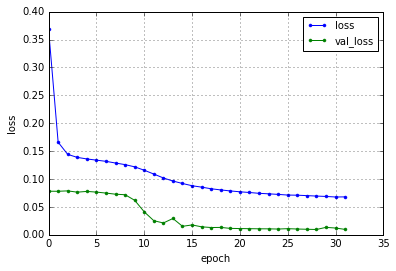

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.5581 - val_loss: 0.0776
Epoch 2/50
15921/15921 [==============================] - 4s - loss: 0.2091 - val_loss: 0.0796
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1876 - val_loss: 0.0792
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1789 - val_loss: 0.0763
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1751 - val_loss: 0.0755
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1710 - val_loss: 0.0737
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1664 - val_loss: 0.0761
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1619 - val_loss: 0.0692
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1572 - val_loss: 0.0639
Epoch 10/50
15921/15921 [==============================] - 4s - loss: 0.1522 - val_loss: 0.0484

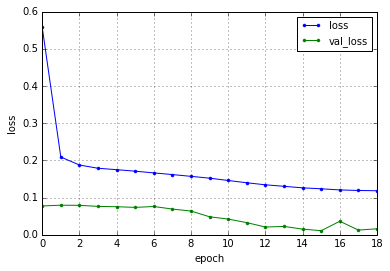

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.6867 - val_loss: 0.0786
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.2944 - val_loss: 0.0777
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.2687 - val_loss: 0.0766
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.2586 - val_loss: 0.0755
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.2552 - val_loss: 0.0772
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.2507 - val_loss: 0.0756
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.2439 - val_loss: 0.0711
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.2366 - val_loss: 0.0609
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.2286 - val_loss: 0.0581
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.2234 - val_loss: 0.0503

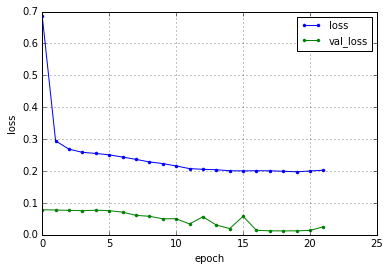

In [10]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()